# Which GPU to use

In [1]:
multiGPU = False
whichGPU = 0
 
# Select which GPU to use
if(multiGPU):
    from keras.utils.training_utils import multi_gpu_model
else:
    import os
    os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
    # The GPU id to use, usually either "0" or "1"
    os.environ["CUDA_VISIBLE_DEVICES"] = str(whichGPU)
    
# # Do other imports now...

# Load all the functions

In [2]:
%run -i 'arena.py'

Using TensorFlow backend.


# General Parameters

In [3]:
import math

# What data to use
tableBase = '4PpKk'
convertStates = False

# Interactive (just in general if one is asked for confirmations, set to False if on autopilot over night f.x.)
askForConfirmation = False

# NN parameters
filters = [16,32,32,64,128,128,128]
filterShape = [2,2,2,2,2,2,2]
batch_size = 256
optimizer = 'Adadelta'
useBatchNorm = False
num_classes = 3
input_shape = (4,8,8)

### DON'T MODIFY BELOW ###
# Generate dataset variables
fileName = tableBase + '.hdf5'
dataSetName = tableBase + '_onlyLegal'
if not convertStates: 
    dataSetName = tableBase + '_onlyLegal_fullStates'
dataSetWdlName = tableBase + '_Wdl_onlyLegal_3Values'

# Number of Pieces
nPi =  int(dataSetName[0])
nPa = nPi - 2
nWPa = math.ceil(nPa/2)

# Experiment 8
Converge rnd>4

## single run only

## parameters

In [4]:
%run -i 'arena.py'

# Parameters
# weightsSource = '103' # trained on 3pc from scratch
# weightsSource = '521' # trained on 3pc then 4pc for 150ep
# sourceNet = '107' # trained on 4pc from scratch ######################## MODIFY
epochs = 160
averageOver = 5
optimizer = 'Adam'

                          ############################### MODIFY
expDescrBase = "converge rnd to 4 - {} epochs".format(epochs)

saveEveryRun = True # save stuff in results dir
saveWeightsCheckpoints = True # save chkp in results dir
saveBengioCheckPoints = False
saveTensorboardLogs = True # save logs in ./logs dir
compareResultsDuringTraining = False
resID = '---NORESID---' # used when not saving data, but fitModel() still needs a resID

fractionOfDataToUse = 1
plotDuringTraining = False
loadWeights = False 
loadCheckpointWeights = False
askForConfirmation = False

### Create model and load data

__________________________________________________ RUN 0
7436088
7436088
X_train shape: (4982178, 4, 8, 8)
y_train shape: (4982178, 1)
X_test shape: (2453910, 4, 8, 8)
y_test shape: (2453910, 1)
4982178 train samples
2453910 test samples
Done loading dataset
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 7, 7)          272       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 6, 32)         928       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 5, 32)         4128      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 4, 64)         8256      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 3, 128)        32896     
_______________

4982178/4982178 [==============================] - 157s 31us/step - loss: 0.0649 - acc: 0.9749 - val_loss: 0.0754 - val_acc: 0.9713

Epoch 00025: val_acc did not improve from 0.97253
Epoch 26/160
4982178/4982178 [==============================] - 157s 31us/step - loss: 0.0642 - acc: 0.9752 - val_loss: 0.0816 - val_acc: 0.9698

Epoch 00026: val_acc did not improve from 0.97253
Epoch 27/160
4982178/4982178 [==============================] - 157s 31us/step - loss: 0.0636 - acc: 0.9755 - val_loss: 0.0752 - val_acc: 0.9717

Epoch 00027: val_acc did not improve from 0.97253
Epoch 28/160
4982178/4982178 [==============================] - 157s 31us/step - loss: 0.0631 - acc: 0.9757 - val_loss: 0.0715 - val_acc: 0.9730

Epoch 00028: val_acc improved from 0.97253 to 0.97300, saving model to Results/784/weightsCheckpoints/weights-checkp-028-0.973.hdf5
Epoch 29/160
4982178/4982178 [==============================] - 157s 31us/step - loss: 0.0625 - acc: 0.9759 - val_loss: 0.0695 - val_acc: 0.9736

E

4982178/4982178 [==============================] - 157s 32us/step - loss: 0.0508 - acc: 0.9809 - val_loss: 0.0593 - val_acc: 0.9778

Epoch 00062: val_acc did not improve from 0.97908
Epoch 63/160
4982178/4982178 [==============================] - 157s 31us/step - loss: 0.0505 - acc: 0.9810 - val_loss: 0.0578 - val_acc: 0.9786

Epoch 00063: val_acc did not improve from 0.97908
Epoch 64/160
4982178/4982178 [==============================] - 157s 31us/step - loss: 0.0503 - acc: 0.9810 - val_loss: 0.0601 - val_acc: 0.9779

Epoch 00064: val_acc did not improve from 0.97908
Epoch 65/160
4982178/4982178 [==============================] - 157s 31us/step - loss: 0.0500 - acc: 0.9812 - val_loss: 0.0577 - val_acc: 0.9789

Epoch 00065: val_acc did not improve from 0.97908
Epoch 66/160
4982178/4982178 [==============================] - 157s 31us/step - loss: 0.0497 - acc: 0.9813 - val_loss: 0.0588 - val_acc: 0.9783

Epoch 00066: val_acc did not improve from 0.97908
Epoch 67/160
4982178/4982178 [===

4982178/4982178 [==============================] - 157s 31us/step - loss: 0.0442 - acc: 0.9836 - val_loss: 0.0526 - val_acc: 0.9813

Epoch 00100: val_acc improved from 0.98120 to 0.98130, saving model to Results/784/weightsCheckpoints/weights-checkp-100-0.981.hdf5
Epoch 101/160
4982178/4982178 [==============================] - 157s 32us/step - loss: 0.0440 - acc: 0.9837 - val_loss: 0.0555 - val_acc: 0.9797

Epoch 00101: val_acc did not improve from 0.98130
Epoch 102/160
4982178/4982178 [==============================] - 157s 32us/step - loss: 0.0438 - acc: 0.9838 - val_loss: 0.0530 - val_acc: 0.9809

Epoch 00102: val_acc did not improve from 0.98130
Epoch 103/160
4982178/4982178 [==============================] - 157s 32us/step - loss: 0.0438 - acc: 0.9838 - val_loss: 0.0547 - val_acc: 0.9805

Epoch 00103: val_acc did not improve from 0.98130
Epoch 104/160
4982178/4982178 [==============================] - 156s 31us/step - loss: 0.0442 - acc: 0.9836 - val_loss: 0.0514 - val_acc: 0.981

4982178/4982178 [==============================] - 157s 32us/step - loss: 0.0409 - acc: 0.9851 - val_loss: 0.0498 - val_acc: 0.9822

Epoch 00139: val_acc did not improve from 0.98273
Epoch 140/160
4982178/4982178 [==============================] - 157s 31us/step - loss: 0.0406 - acc: 0.9852 - val_loss: 0.0507 - val_acc: 0.9821

Epoch 00140: val_acc did not improve from 0.98273
Epoch 141/160
4982178/4982178 [==============================] - 157s 32us/step - loss: 0.0408 - acc: 0.9851 - val_loss: 0.0495 - val_acc: 0.9824

Epoch 00141: val_acc did not improve from 0.98273
Epoch 142/160
4982178/4982178 [==============================] - 157s 31us/step - loss: 0.0406 - acc: 0.9852 - val_loss: 0.0493 - val_acc: 0.9825

Epoch 00142: val_acc did not improve from 0.98273
Epoch 143/160
4982178/4982178 [==============================] - 157s 32us/step - loss: 0.0406 - acc: 0.9852 - val_loss: 0.0583 - val_acc: 0.9798

Epoch 00143: val_acc did not improve from 0.98273
Epoch 144/160
4982178/4982178

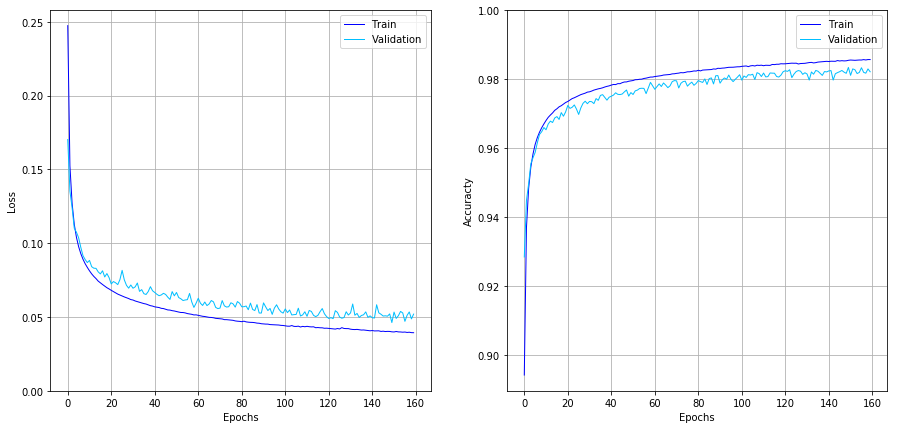

Saving summary...
Saving tensorboard logs...
All done saving stuff!
__________________________________________________ RUN 1
7436088
7436088
X_train shape: (4982178, 4, 8, 8)
y_train shape: (4982178, 1)
X_test shape: (2453910, 4, 8, 8)
y_test shape: (2453910, 1)
4982178 train samples
2453910 test samples
Done loading dataset
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 16, 7, 7)          272       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 6, 32)         928       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 5, 32)         4128      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 4, 64)         8256      
_________________________________________________________________
conv2d_12 (Co


Epoch 00024: val_acc improved from 0.97360 to 0.97440, saving model to Results/785/weightsCheckpoints/weights-checkp-024-0.974.hdf5
Epoch 25/160
4982178/4982178 [==============================] - 158s 32us/step - loss: 0.0607 - acc: 0.9768 - val_loss: 0.0683 - val_acc: 0.9743

Epoch 00025: val_acc did not improve from 0.97440
Epoch 26/160
4982178/4982178 [==============================] - 158s 32us/step - loss: 0.0601 - acc: 0.9770 - val_loss: 0.0673 - val_acc: 0.9747

Epoch 00026: val_acc improved from 0.97440 to 0.97470, saving model to Results/785/weightsCheckpoints/weights-checkp-026-0.975.hdf5
Epoch 27/160
4982178/4982178 [==============================] - 158s 32us/step - loss: 0.0594 - acc: 0.9773 - val_loss: 0.0641 - val_acc: 0.9760

Epoch 00027: val_acc improved from 0.97470 to 0.97600, saving model to Results/785/weightsCheckpoints/weights-checkp-027-0.976.hdf5
Epoch 28/160
4982178/4982178 [==============================] - 158s 32us/step - loss: 0.0587 - acc: 0.9775 - val_l

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 156s 31us/step - loss: 0.0481 - acc: 0.9820 - val_loss: 0.0564 - val_acc: 0.9793

Epoch 00057: val_acc improved from 0.97929 to 0.97932, saving model to Results/785/weightsCheckpoints/weights-checkp-057-0.979.hdf5
Epoch 58/160
 459776/4982178 [=>............................] - ETA: 2:06 - loss: 0.0458 - acc: 0.9828

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2583040/4982178 [==============>...............] - ETA: 1:06 - loss: 0.0466 - acc: 0.9826

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 155s 31us/step - loss: 0.0472 - acc: 0.9825 - val_loss: 0.0592 - val_acc: 0.9785

Epoch 00062: val_acc did not improve from 0.98026
Epoch 63/160
 738304/4982178 [===>..........................] - ETA: 1:58 - loss: 0.0451 - acc: 0.9832

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2917120/4982178 [================>.............] - ETA: 57s - loss: 0.0461 - acc: 0.9828

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 156s 31us/step - loss: 0.0461 - acc: 0.9828 - val_loss: 0.0554 - val_acc: 0.9799

Epoch 00067: val_acc did not improve from 0.98026
Epoch 68/160
1069824/4982178 [=====>........................] - ETA: 1:48 - loss: 0.0445 - acc: 0.9835

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



3168768/4982178 [==================>...........] - ETA: 50s - loss: 0.0454 - acc: 0.9831

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 155s 31us/step - loss: 0.0455 - acc: 0.9831 - val_loss: 0.0579 - val_acc: 0.9790

Epoch 00072: val_acc did not improve from 0.98075
Epoch 73/160
1327872/4982178 [======>.......................] - ETA: 1:41 - loss: 0.0433 - acc: 0.9839

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



3305984/4982178 [==================>...........] - ETA: 46s - loss: 0.0445 - acc: 0.9835

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 156s 31us/step - loss: 0.0446 - acc: 0.9835 - val_loss: 0.0532 - val_acc: 0.9809

Epoch 00077: val_acc did not improve from 0.98142
Epoch 78/160
1495296/4982178 [========>.....................] - ETA: 1:36 - loss: 0.0434 - acc: 0.9839

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



3121920/4982178 [=================>............] - ETA: 51s - loss: 0.0437 - acc: 0.9839

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 155s 31us/step - loss: 0.0438 - acc: 0.9837 - val_loss: 0.0495 - val_acc: 0.9821

Epoch 00082: val_acc improved from 0.98142 to 0.98213, saving model to Results/785/weightsCheckpoints/weights-checkp-082-0.982.hdf5
Epoch 83/160
1048320/4982178 [=====>........................] - ETA: 1:49 - loss: 0.0421 - acc: 0.9845

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2694656/4982178 [===============>..............] - ETA: 1:02 - loss: 0.0428 - acc: 0.9842

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 155s 31us/step - loss: 0.0433 - acc: 0.9841 - val_loss: 0.0518 - val_acc: 0.9813

Epoch 00087: val_acc did not improve from 0.98213
Epoch 88/160
1081600/4982178 [=====>........................] - ETA: 1:48 - loss: 0.0416 - acc: 0.9847

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2838272/4982178 [================>.............] - ETA: 59s - loss: 0.0422 - acc: 0.9844

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 156s 31us/step - loss: 0.0427 - acc: 0.9843 - val_loss: 0.0593 - val_acc: 0.9796

Epoch 00092: val_acc did not improve from 0.98213
Epoch 93/160
 868864/4982178 [====>.........................] - ETA: 1:54 - loss: 0.0406 - acc: 0.9850

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2693376/4982178 [===============>..............] - ETA: 1:03 - loss: 0.0419 - acc: 0.9846

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 156s 31us/step - loss: 0.0418 - acc: 0.9846 - val_loss: 0.0527 - val_acc: 0.9814

Epoch 00097: val_acc did not improve from 0.98213
Epoch 98/160
1063936/4982178 [=====>........................] - ETA: 1:48 - loss: 0.0407 - acc: 0.9851

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2682112/4982178 [===============>..............] - ETA: 1:03 - loss: 0.0413 - acc: 0.9848

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4576768/4982178 [==========================>...] - ETA: 11s - loss: 0.0414 - acc: 0.9848

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 155s 31us/step - loss: 0.0411 - acc: 0.9849 - val_loss: 0.0516 - val_acc: 0.9819

Epoch 00102: val_acc did not improve from 0.98222
Epoch 103/160
 591872/4982178 [==>...........................] - ETA: 2:03 - loss: 0.0386 - acc: 0.9857

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 156s 31us/step - loss: 0.0410 - acc: 0.9850 - val_loss: 0.0507 - val_acc: 0.9821

Epoch 00105: val_acc did not improve from 0.98222
Epoch 106/160
4076800/4982178 [=======================>......] - ETA: 24s - loss: 0.0409 - acc: 0.9850

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 155s 31us/step - loss: 0.0409 - acc: 0.9850 - val_loss: 0.0506 - val_acc: 0.9821

Epoch 00107: val_acc did not improve from 0.98250
Epoch 108/160
 443392/4982178 [=>............................] - ETA: 2:06 - loss: 0.0382 - acc: 0.9860

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 155s 31us/step - loss: 0.0409 - acc: 0.9850 - val_loss: 0.0501 - val_acc: 0.9822

Epoch 00110: val_acc did not improve from 0.98250
Epoch 111/160
4481280/4982178 [=========================>....] - ETA: 13s - loss: 0.0407 - acc: 0.9851

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 156s 31us/step - loss: 0.0405 - acc: 0.9852 - val_loss: 0.0530 - val_acc: 0.9813

Epoch 00112: val_acc did not improve from 0.98265
Epoch 113/160
 698368/4982178 [===>..........................] - ETA: 1:59 - loss: 0.0387 - acc: 0.9857

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 156s 31us/step - loss: 0.0404 - acc: 0.9853 - val_loss: 0.0496 - val_acc: 0.9827

Epoch 00115: val_acc improved from 0.98265 to 0.98267, saving model to Results/785/weightsCheckpoints/weights-checkp-115-0.983.hdf5
Epoch 116/160
4455168/4982178 [=========================>....] - ETA: 14s - loss: 0.0401 - acc: 0.9853

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 156s 31us/step - loss: 0.0402 - acc: 0.9853 - val_loss: 0.0512 - val_acc: 0.9817

Epoch 00117: val_acc did not improve from 0.98316
Epoch 118/160
 727552/4982178 [===>..........................] - ETA: 1:58 - loss: 0.0382 - acc: 0.9861

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 156s 31us/step - loss: 0.0401 - acc: 0.9853 - val_loss: 0.0514 - val_acc: 0.9818

Epoch 00120: val_acc did not improve from 0.98316
Epoch 121/160
4479488/4982178 [=========================>....] - ETA: 13s - loss: 0.0396 - acc: 0.9856

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 156s 31us/step - loss: 0.0399 - acc: 0.9856 - val_loss: 0.0493 - val_acc: 0.9827

Epoch 00122: val_acc did not improve from 0.98316
Epoch 123/160
 963072/4982178 [====>.........................] - ETA: 1:51 - loss: 0.0383 - acc: 0.9861

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 156s 31us/step - loss: 0.0399 - acc: 0.9855 - val_loss: 0.0542 - val_acc: 0.9811

Epoch 00125: val_acc did not improve from 0.98316
Epoch 126/160
4275200/4982178 [========================>.....] - ETA: 19s - loss: 0.0396 - acc: 0.9857

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 156s 31us/step - loss: 0.0394 - acc: 0.9856 - val_loss: 0.0510 - val_acc: 0.9822

Epoch 00127: val_acc did not improve from 0.98316
Epoch 128/160
 541184/4982178 [==>...........................] - ETA: 2:04 - loss: 0.0376 - acc: 0.9862

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 155s 31us/step - loss: 0.0393 - acc: 0.9857 - val_loss: 0.0505 - val_acc: 0.9824

Epoch 00130: val_acc did not improve from 0.98338
Epoch 131/160
4380672/4982178 [=========================>....] - ETA: 16s - loss: 0.0397 - acc: 0.9857

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 156s 31us/step - loss: 0.0392 - acc: 0.9858 - val_loss: 0.0480 - val_acc: 0.9832

Epoch 00132: val_acc did not improve from 0.98338
Epoch 133/160
 570368/4982178 [==>...........................] - ETA: 2:03 - loss: 0.0369 - acc: 0.9865

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 156s 31us/step - loss: 0.0394 - acc: 0.9857 - val_loss: 0.0490 - val_acc: 0.9831

Epoch 00135: val_acc did not improve from 0.98338
Epoch 136/160
3485184/4982178 [===================>..........] - ETA: 41s - loss: 0.0388 - acc: 0.9860

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4842496/4982178 [============================>.] - ETA: 3s - loss: 0.0391 - acc: 0.9858

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 156s 31us/step - loss: 0.0389 - acc: 0.9859 - val_loss: 0.0509 - val_acc: 0.9821

Epoch 00140: val_acc did not improve from 0.98338
Epoch 141/160
3634176/4982178 [====================>.........] - ETA: 37s - loss: 0.0385 - acc: 0.9860

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4704256/4982178 [===========================>..] - ETA: 7s - loss: 0.0386 - acc: 0.9860

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 156s 31us/step - loss: 0.0388 - acc: 0.9859 - val_loss: 0.0490 - val_acc: 0.9829

Epoch 00145: val_acc did not improve from 0.98363
Epoch 146/160
3394816/4982178 [===================>..........] - ETA: 43s - loss: 0.0383 - acc: 0.9862

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4804864/4982178 [===========================>..] - ETA: 4s - loss: 0.0385 - acc: 0.9861

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 155s 31us/step - loss: 0.0384 - acc: 0.9861 - val_loss: 0.0468 - val_acc: 0.9837

Epoch 00150: val_acc improved from 0.98363 to 0.98368, saving model to Results/785/weightsCheckpoints/weights-checkp-150-0.984.hdf5
Epoch 151/160
3634176/4982178 [====================>.........] - ETA: 37s - loss: 0.0382 - acc: 0.9862

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 155s 31us/step - loss: 0.0383 - acc: 0.9861 - val_loss: 0.0505 - val_acc: 0.9822

Epoch 00152: val_acc did not improve from 0.98368
Epoch 153/160
 199168/4982178 [>.............................] - ETA: 2:16 - loss: 0.0346 - acc: 0.9875

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 156s 31us/step - loss: 0.0382 - acc: 0.9862 - val_loss: 0.0499 - val_acc: 0.9827

Epoch 00155: val_acc did not improve from 0.98388
Epoch 156/160
3627520/4982178 [====================>.........] - ETA: 37s - loss: 0.0379 - acc: 0.9864

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 155s 31us/step - loss: 0.0383 - acc: 0.9862 - val_loss: 0.0474 - val_acc: 0.9837

Epoch 00157: val_acc did not improve from 0.98388
Epoch 158/160
 102656/4982178 [..............................] - ETA: 2:22 - loss: 0.0335 - acc: 0.9877

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 156s 31us/step - loss: 0.0381 - acc: 0.9862 - val_loss: 0.0486 - val_acc: 0.9830

Epoch 00160: val_acc did not improve from 0.98388
Training done
Calculating score
1958112/2453910 [======================>.......] - ETA: 24s

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 157s 31us/step - loss: 0.2511 - acc: 0.8924 - val_loss: 0.1773 - val_acc: 0.9249

Epoch 00001: val_acc improved from -inf to 0.92492, saving model to Results/787/weightsCheckpoints/weights-checkp-001-0.925.hdf5
Epoch 2/160
 826112/4982178 [===>..........................] - ETA: 1:56 - loss: 0.1715 - acc: 0.9282

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 157s 31us/step - loss: 0.1089 - acc: 0.9558 - val_loss: 0.1090 - val_acc: 0.9557

Epoch 00004: val_acc improved from 0.95140 to 0.95568, saving model to Results/787/weightsCheckpoints/weights-checkp-004-0.956.hdf5
Epoch 5/160
4982178/4982178 [==============================] - 157s 31us/step - loss: 0.0978 - acc: 0.9605 - val_loss: 0.0996 - val_acc: 0.9602

Epoch 00005: val_acc improved from 0.95568 to 0.96021, saving model to Results/787/weightsCheckpoints/weights-checkp-005-0.960.hdf5
Epoch 6/160
 545280/4982178 [==>...........................] - ETA: 2:04 - loss: 0.0897 - acc: 0.9643

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 157s 31us/step - loss: 0.0762 - acc: 0.9698 - val_loss: 0.0804 - val_acc: 0.9682

Epoch 00009: val_acc improved from 0.96713 to 0.96818, saving model to Results/787/weightsCheckpoints/weights-checkp-009-0.968.hdf5
Epoch 10/160
4982178/4982178 [==============================] - 157s 31us/step - loss: 0.0731 - acc: 0.9711 - val_loss: 0.0741 - val_acc: 0.9707

Epoch 00010: val_acc improved from 0.96818 to 0.97072, saving model to Results/787/weightsCheckpoints/weights-checkp-010-0.971.hdf5
Epoch 11/160
 695296/4982178 [===>..........................] - ETA: 1:59 - loss: 0.0686 - acc: 0.9729

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Epoch 00014: val_acc improved from 0.97244 to 0.97370, saving model to Results/787/weightsCheckpoints/weights-checkp-014-0.974.hdf5
Epoch 15/160
4982178/4982178 [==============================] - 157s 31us/step - loss: 0.0626 - acc: 0.9755 - val_loss: 0.0697 - val_acc: 0.9728

Epoch 00015: val_acc did not improve from 0.97370
Epoch 16/160
 823552/4982178 [===>..........................] - ETA: 1:55 - loss: 0.0599 - acc: 0.9765

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 157s 31us/step - loss: 0.0579 - acc: 0.9776 - val_loss: 0.0617 - val_acc: 0.9764

Epoch 00019: val_acc improved from 0.97574 to 0.97635, saving model to Results/787/weightsCheckpoints/weights-checkp-019-0.976.hdf5
Epoch 20/160
4982178/4982178 [==============================] - 157s 31us/step - loss: 0.0570 - acc: 0.9779 - val_loss: 0.0633 - val_acc: 0.9756

Epoch 00020: val_acc did not improve from 0.97635
Epoch 21/160
 396288/4982178 [=>............................] - ETA: 2:10 - loss: 0.0540 - acc: 0.9790

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 157s 31us/step - loss: 0.0539 - acc: 0.9792 - val_loss: 0.0600 - val_acc: 0.9772

Epoch 00024: val_acc improved from 0.97635 to 0.97716, saving model to Results/787/weightsCheckpoints/weights-checkp-024-0.977.hdf5
Epoch 25/160
4982178/4982178 [==============================] - 157s 31us/step - loss: 0.0531 - acc: 0.9795 - val_loss: 0.0594 - val_acc: 0.9776

Epoch 00025: val_acc improved from 0.97716 to 0.97762, saving model to Results/787/weightsCheckpoints/weights-checkp-025-0.978.hdf5
Epoch 26/160
  38656/4982178 [..............................] - ETA: 2:42 - loss: 0.0468 - acc: 0.9823

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 157s 31us/step - loss: 0.0507 - acc: 0.9806 - val_loss: 0.0572 - val_acc: 0.9784

Epoch 00029: val_acc improved from 0.97834 to 0.97841, saving model to Results/787/weightsCheckpoints/weights-checkp-029-0.978.hdf5
Epoch 30/160
4575744/4982178 [==========================>...] - ETA: 11s - loss: 0.0503 - acc: 0.9807

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 157s 31us/step - loss: 0.0485 - acc: 0.9814 - val_loss: 0.0560 - val_acc: 0.9790

Epoch 00034: val_acc improved from 0.97894 to 0.97897, saving model to Results/787/weightsCheckpoints/weights-checkp-034-0.979.hdf5
Epoch 35/160
4083456/4982178 [=======================>......] - ETA: 24s - loss: 0.0479 - acc: 0.9817

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 157s 31us/step - loss: 0.0469 - acc: 0.9821 - val_loss: 0.0543 - val_acc: 0.9798

Epoch 00039: val_acc did not improve from 0.97985
Epoch 40/160
3697408/4982178 [=====================>........] - ETA: 35s - loss: 0.0462 - acc: 0.9824

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 157s 31us/step - loss: 0.0453 - acc: 0.9828 - val_loss: 0.0515 - val_acc: 0.9808

Epoch 00044: val_acc improved from 0.98062 to 0.98076, saving model to Results/787/weightsCheckpoints/weights-checkp-044-0.981.hdf5
Epoch 45/160
2729216/4982178 [===============>..............] - ETA: 1:02 - loss: 0.0443 - acc: 0.9832

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 157s 31us/step - loss: 0.0440 - acc: 0.9834 - val_loss: 0.0509 - val_acc: 0.9812

Epoch 00049: val_acc did not improve from 0.98123
Epoch 50/160
2389504/4982178 [=============>................] - ETA: 1:11 - loss: 0.0429 - acc: 0.9838

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 157s 31us/step - loss: 0.0430 - acc: 0.9838 - val_loss: 0.0533 - val_acc: 0.9806

Epoch 00054: val_acc did not improve from 0.98157
Epoch 55/160
2222080/4982178 [============>.................] - ETA: 1:16 - loss: 0.0418 - acc: 0.9843

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 157s 31us/step - loss: 0.0420 - acc: 0.9843 - val_loss: 0.0531 - val_acc: 0.9808

Epoch 00059: val_acc did not improve from 0.98193
Epoch 60/160
1701888/4982178 [=========>....................] - ETA: 1:31 - loss: 0.0406 - acc: 0.9847

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 152s 30us/step - loss: 0.0413 - acc: 0.9845 - val_loss: 0.0519 - val_acc: 0.9814

Epoch 00064: val_acc did not improve from 0.98193
Epoch 65/160
3402240/4982178 [===================>..........] - ETA: 41s - loss: 0.0405 - acc: 0.9849

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4982178/4982178 [==============================] - 150s 30us/step - loss: 0.0409 - acc: 0.9847 - val_loss: 0.0526 - val_acc: 0.9808

Epoch 00065: val_acc did not improve from 0.98193
Epoch 66/160
4982178/4982178 [==============================] - 157s 32us/step - loss: 0.0408 - acc: 0.9848 - val_loss: 0.0513 - val_acc: 0.9815

Epoch 00066: val_acc did not improve from 0.98193
Epoch 67/160
4982178/4982178 [==============================] - 157s 32us/step - loss: 0.0409 - acc: 0.9846 - val_loss: 0.0495 - val_acc: 0.9819

Epoch 00067: val_acc did not improve from 0.98193
Epoch 68/160
4982178/4982178 [==============================] - 157s 32us/step - loss: 0.0405 - acc: 0.9848 - val_loss: 0.0485 - val_acc: 0.9824

Epoch 00068: val_acc improved from 0.98193 to 0.98241, saving model to Results/787/weightsCheckpoints/weights-checkp-068-0.982.hdf5
Epoch 69/160
4982178/4982178 [==============================] - 157s 31us/step - loss: 0.0405 - acc: 0.9849 - val_loss: 0.0554 - val_acc: 0.9802

E

In [ ]:
# stuff to save in bengioResults dir
# resSaveFile = 'conv3to4-startingAt300epochs'
# dictFieldName = 'acc'
# saveDir = 'bengioResults'
# resSaveFile = resSaveFile + '-{}runAverage-{}epochs'.format(averageOver, epochs)
# resSaveFileFullPath = saveDir + '/' + str(resSaveFile) + '.pkl' 

# prepare save file
# if os.path.exists(resSaveFileFullPath):
#     print("Save file exists..., aborting\n")
#     sys.exit()
    
for i in range(averageOver):
    print("__________________________________________________ RUN {}".format(i))
    expDescr = expDescrBase + ' - run {} of {}'.format(i,averageOver)
    # load data
    X_train, X_test, y_train, y_test = loadData(randomState = None)

    # create model
    model, nnStr = createModel()

    # create results dir
    resID = genNextResultsDir(model)

    # train
    fitHistory, logDir = trainModel(resID, model, saveWeightsCheckpoints, saveTensorboardLogs)

    # calc score 
    score = calcScore(model)
    if saveEveryRun:
        saveTrainResults(resID, model, logDir, score)

    # save results 
#     save_obj(saveDir, resSaveFile, [score[1]])
#     with open(saveDir + '/' + str(resSaveFile) + '.txt','w') as file:
#         file.write(str([score[1]]))

#     print('\n Final Results: {}'.format(score[1]))

In [ ]:
sys.exit()

# Experiment 0
Converge 3>4 and rnd>4

## parameters

In [ ]:
%run -i 'arena.py'

# Parameters
# weightsSource = '103' # trained on 3pc from scratch
weightsSource = '521' # trained on 3pc then 4pc for 150ep
# sourceNet = '107' # trained on 4pc from scratch ######################## MODIFY
epochs = 10
averageOver = 1
                          ############################### MODIFY
expDescrBaseName = "converge 3to4 - {} averages - {} epochs".format(averageOver, epochs)

saveEveryRun = True # save stuff in results dir
saveWeightsCheckpoints = False # save chkp in results dir
saveBengioCheckPoints = True
saveTensorboardLogs = True # save logs in ./logs dir
compareResultsDuringTraining = False
resID = '---NORESID---' # used when not saving data, but fitModel() still needs a resID

fractionOfDataToUse = 0.0001
plotDuringTraining = True
loadWeights = True 
loadCheckpointWeights = False
askForConfirmation = False

# stuff to save in bengioResults dir
resSaveFile = 'conv3to4-startingAt300epochs'
dictFieldName = 'acc'
saveDir = 'bengioResults'
resSaveFile = resSaveFile + '-{}runAverage-{}epochs'.format(averageOver, epochs)
resSaveFileFullPath = saveDir + '/' + str(resSaveFile) + '.pkl' 
# resSaveFileAllRuns = resSaveFile + '-allRuns'.format(averageOver, epochs)
# resSaveFileAllRunsFullPath = saveDir + '/' + str(resSaveFileAllRuns) + '.pkl' 
# resSaveFileThisRun = resSaveFile + '-thisRun'.format(averageOver, epochs)
# resSaveFileThisRunFullPath = saveDir + '/' + str(resSaveFileThisRun) + '.pkl' 

### Create model and load data

In [ ]:
# prepare save file
if not os.path.exists(resSaveFileFullPath):
    print("Save file doesn't exists, creating...\n")
    save_obj(saveDir, resSaveFile, {dictFieldName:[]})
else:
    print("Save file exists...\n")
    
# load data
X_train, X_test, y_train, y_test = loadData(randomState = None)

# create model
# model, nnStr = createModel()

# load old results
results = load_obj(saveDir, resSaveFile)
# resultsAllRuns = load_obj(saveDir, resSaveFileAllRuns)
# resultsThisRun = load_obj(saveDir, resSaveFileThisRun)

# initialize variables wrt old results
# startTrainingAtLayer = len(results)
# print("\nStarting/restarting TL at {} transfered layers".format(startTrainingAtLayer))
# startThisRunAt = len(resultsThisRun)
startThisRunAt = len(results[dictFieldName])
print("\nStarting/restarting TL at average {}".format(startThisRunAt))

In [ ]:
print(results)

### Train

In [ ]:
%run -i 'arena.py'

# train and average results
for a in range(startThisRunAt,averageOver):
    print('    ==================================================================================')
    print('    =                                                                                =')
    print('    =                Currently at run {}, out of {}                                   ='.format(a+1,averageOver))
    print('    =                                                                                =')
    print('    ==================================================================================')
    print()

    # set experement description test
#     expDescr = expDescrBaseName + '__copyLayers_{}__average_{}_of_{}'.format(copyFirstNLayers, a+1, averageOver)
    expDescr = expDescrBaseName + '__average_{}_of_{}'.format(a+1, averageOver)

    # save current averagePosition to tmp file
    with open(saveDir + '/' + str(resSaveFile) + '_currentPosition.txt','w') as file:
        file.write('Inner avg loop position: {} out of {}'.format(a+1, averageOver))         

    # load Model layers
#     model = loadNFirstLayers(model, sourceNet, copyFirstNLayers , freeze)
    model, nnStr = createModel()

    # load data
    X_train, X_test, y_train, y_test = loadData(randomState = None)
    
    # Prepare save dir
    if saveEveryRun:
        resID = genNextResultsDir(model)

    # train
    fitHistory, logDir = trainModel(resID, model, saveWeightsCheckpoints, saveTensorboardLogs)

    # calc score 
    score = calcScore(model)
    results[dictFieldName].append(score[1])
    if saveEveryRun:
        saveTrainResults(resID, model, logDir, score)

    # save checkpoint
    if saveBengioCheckPoints:
        dateTime = time.strftime('%Y-%m-%d-%H:%M:%S', time.localtime())

        src = saveDir + '/' + str(resSaveFile) + '.pkl'
        dest = saveDir + '/checkpoints/' + str(resSaveFile) + dateTime + '.pkl'
        if os.path.exists(src):
            shutil.move(src, dest)

        src = saveDir + '/' + str(resSaveFile) + '.txt'
        dest = saveDir + '/checkpoints/' + str(resSaveFile) + dateTime + '.txt'
        if os.path.exists(src):
            shutil.move(src, dest)

    # save results 
    save_obj(saveDir, resSaveFile, results)
    with open(saveDir + '/' + str(resSaveFile) + '.txt','w') as file:
        file.write(str(results))


print('\n Final Results: {}'.format(results))
print('\n Final Results Averate: {}'.format(np.mean(np.array(results[dictFieldName]))))


In [ ]:
dateTime = time.strftime('%Y-%m-%d-%H:%M:%S', time.localtime())

src = saveDir + '/' + str(resSaveFile) + '.pkl'
dest = saveDir + '/checkpoints/' + str(resSaveFile) + dateTime + '.pkl'
if os.path.exists(src):
    shutil.move(src, dest)

src = saveDir + '/' + str(resSaveFile) + '.txt'
dest = saveDir + '/checkpoints/' + str(resSaveFile) + dateTime + '.txt'
if os.path.exists(src):
    shutil.move(src, dest)

# save results 
save_obj(saveDir, resSaveFile, results)
with open(saveDir + '/' + str(resSaveFile) + '.txt','w') as file:
    file.write(str(results))

In [ ]:
sys.exit()

# Experiment 4
Bengio methood
4n4

## parameters

In [ ]:
%run -i 'arena.py'

# Parameters
# sourceNet = '103' # trained on 3pc from scratch
sourceNet = '107' # trained on 4pc from scratch ######################## MODIFY
freeze = True                           ############################### MODIFY
epochs = 10
averageOver = 5 
                          ############################### MODIFY
expDescrBaseName = "Bengio 4n4 - freeze = {} - average over {} runs - {} epochs".format(str(freeze), averageOver, epochs)

saveEveryRun = True # save stuff in results dir
saveWeightsCheckpoints = False # save chkp in results dit
saveTensorboardLogs = True # save logs in ./logs dir
resID = '---NORESID---' # used when not saving data, but fitModel() still needs a resID

fractionOfDataToUse = 1
plotDuringTraining = False
loadWeights = False #only used in createModel function, the loadFirstNLayers always loads weights! 
askForConfirmation = False

# stuff to save in bengioResults dir
resSaveFile = '4n4'
saveDir = 'bengioResults'
# resSaveFile = resSaveFile + '-{}runAverage-{}epochs'.format(averageOver, epochs)
resSaveFileFullPath = saveDir + '/' + str(resSaveFile) + '.pkl' 
resSaveFileAllRuns = resSaveFile + '-allRuns'.format(averageOver, epochs)
resSaveFileAllRunsFullPath = saveDir + '/' + str(resSaveFileAllRuns) + '.pkl' 
resSaveFileThisRun = resSaveFile + '-thisRun'.format(averageOver, epochs)
resSaveFileThisRunFullPath = saveDir + '/' + str(resSaveFileThisRun) + '.pkl' 

### Create model and load data

In [ ]:
# prepare save file
if not os.path.exists(resSaveFileFullPath):
    print("Save file doesn't exists, creating...\n")
    save_obj(saveDir, resSaveFile, [])
else:
    print("Save file exists...\n")
    
if not os.path.exists(resSaveFileAllRunsFullPath):
    print("Save file for all runs doesn't exists, creating...\n")
    save_obj(saveDir, resSaveFileAllRuns, [])
else:
    print("Save file for all runs exists...\n")

if not os.path.exists(resSaveFileThisRunFullPath):
    print("Save file for this run doesn't exists, creating...\n")
    save_obj(saveDir, resSaveFileThisRun, [])
else:
    print("Save file for this run exists...\n")

# load data
X_train, X_test, y_train, y_test = loadData(randomState = None)

# create model
model, nnStr = createModel()
layersCount = len(model.layers)

# load old results
results = load_obj(saveDir, resSaveFile)
resultsAllRuns = load_obj(saveDir, resSaveFileAllRuns)
resultsThisRun = load_obj(saveDir, resSaveFileThisRun)

# initialize variables wrt old results
startTrainingAtLayer = len(results)
print("\nStarting/restarting TL at {} transfered layers".format(startTrainingAtLayer))
# startThisRunAt = len(resultsThisRun)
# print("\nStarting/restarting TL at average {}".format(startTrainingAtLayer))

In [ ]:
print(results)
print(resultsThisRun)
print(resultsAllRuns)

### Train

In [ ]:
%run -i 'arena.py'

for copyFirstNLayers in range(startTrainingAtLayer, layersCount):
    print('\n\n')
    print('==========================================================================================')
    print('=                                                                                        =')
    print('=                    Currently transfering first {} layers, out of {}                      ='.format(copyFirstNLayers, layersCount - 1))
    print('=                                                                                        =')
    print('==========================================================================================')
    print()
    
    # check if we are at the flatten layer, and skip it if so
    if copyFirstNLayers == layersCount - 1:
        copyFirstNLayers += 1
        
#     # start accumulated score from load file in case of starting from average run ≠ 0
#     accumulatedScore = np.sum(resultsThisRun)

    # Reset variables
    resultsThisRun = []
    accumulatedScore = 0
    
    # train and average results
    for a in range(averageOver):
        print('    ==================================================================================')
        print('    =                                                                                =')
        print('    =                Currently at run {}, out of {}                                   ='.format(a+1,averageOver))
        print('    =                                                                                =')
        print('    ==================================================================================')
        print()
        
        # set experement description test
        expDescr = expDescrBaseName + '__copyLayers_{}__average_{}_of_{}'.format(copyFirstNLayers, a+1, averageOver)
        
        # save current averagePosition to tmp file
        with open(saveDir + '/' + str(resSaveFile) + '_currentPosition.txt','w') as file:
            if copyFirstNLayers == layersCount:
                location = copyFirstNLayers - 1
            else:
                location = copyFirstNLayers 
            file.write('Layers Transfered: {} out of {} \nInner avg loop position: {} out of {}'.format(location, layersCount-1, a+1, averageOver))         
            
        # load Model layers
        model = loadNFirstLayers(model, sourceNet, copyFirstNLayers , freeze)

        # load data
        X_train, X_test, y_train, y_test = loadData(randomState = None)

        # Prepare save dir
        if saveEveryRun:
            resID = genNextResultsDir(model)

        # train
        fitHistory, logDir = trainModel(resID, model, saveWeightsCheckpoints, saveTensorboardLogs)

        # score and save results
        score = calcScore(model)
        if saveEveryRun:
            saveTrainResults(resID, model, logDir, score, copyFirstNLayers)

        # update Return
        accumulatedScore += score[1]
        resultsThisRun.append(score[1])
        
        # save bengio checkpoint
        dateTime = time.strftime('%Y-%m-%d-%H:%M:%S', time.localtime())
        
        src = saveDir + '/' + str(resSaveFileThisRun) + '.pkl'
        dest = saveDir + '/checkpoints/' + str(resSaveFileThisRun) + dateTime + '.pkl'
        if os.path.exists(src):
            shutil.move(src, dest)
            
        src = saveDir + '/' + str(resSaveFileThisRun) + '.txt'
        dest = saveDir + '/checkpoints/' + str(resSaveFileThisRun) + dateTime + '.txt'
        if os.path.exists(src):
            shutil.move(src, dest)
        
        # save results 
        save_obj(saveDir, resSaveFileThisRun, resultsThisRun)
        with open(saveDir + '/' + str(resSaveFileThisRun) + '.txt','w') as file:
            file.write(str(resultsThisRun))
            
    # append averaged results for one set of layers
    results.append(accumulatedScore/averageOver)
    resultsAllRuns.append(resultsThisRun)

    # save old results to checkpoints dir
    dateTime = time.strftime('%Y-%m-%d-%H:%M:%S', time.localtime())
    
    src = saveDir + '/' + str(resSaveFile) + '.txt'
    dest = saveDir + '/checkpoints/' + str(resSaveFile) + dateTime + '.txt'
    if os.path.exists(src):
        shutil.move(src, dest)
        
    src = saveDir + '/' + str(resSaveFile) + '.pkl'
    dest = saveDir + '/checkpoints/' + str(resSaveFile) + dateTime + '.pkl'
    if os.path.exists(src):
        shutil.move(src, dest)

    src = saveDir + '/' + str(resSaveFileAllRuns) + '.txt'
    dest = saveDir + '/checkpoints/' + str(resSaveFileAllRuns) + dateTime + '.txt'
    if os.path.exists(src):
        shutil.move(src, dest)
        
    src = saveDir + '/' + str(resSaveFileAllRuns) + '.pkl'
    dest = saveDir + '/checkpoints/' + str(resSaveFileAllRuns) + dateTime + '.pkl'
    if os.path.exists(src):
        shutil.move(src, dest)
        
    # save results 
    save_obj(saveDir, resSaveFile, results)
    with open(saveDir + '/' + str(resSaveFile) + '.txt','w') as file:
        file.write(str(results))
    
    save_obj(saveDir, resSaveFileAllRuns, resultsAllRuns)
    with open(saveDir + '/' + str(resSaveFileAllRuns) + '.txt','w') as file:
        file.write(str(resultsAllRuns))
    
print('\n Final Results: {}'.format(results))

# Experiment 5
Bengio methood
4n4

## exp  parameters

In [ ]:
%run -i 'arena.py'

# Parameters
# sourceNet = '103' # trained on 3pc from scratch
sourceNet = '107' # trained on 4pc from scratch ######################## MODIFY
freeze = True                           ############################### MODIFY
epochs = 10
averageOver = 5 
                          ############################### MODIFY
expDescrBaseName = "Bengio 4n4 - freeze = {} - average over {} runs - {} epochs".format(str(freeze), averageOver, epochs)

saveEveryRun = True # save stuff in results dir
saveWeightsCheckpoints = False # save chkp in results dit
saveTensorboardLogs = True # save logs in ./logs dir
resID = '---NORESID---' # used when not saving data, but fitModel() still needs a resID

fractionOfDataToUse = 1
plotDuringTraining = False
loadWeights = False 
askForConfirmation = False

# stuff to save in bengioResults dir
resSaveFile = '4n4p'
saveDir = 'bengioResults'
# resSaveFile = resSaveFile + '-{}runAverage-{}epochs'.format(averageOver, epochs)
resSaveFileFullPath = saveDir + '/' + str(resSaveFile) + '.pkl' 
resSaveFileAllRuns = resSaveFile + '-allRuns'.format(averageOver, epochs)
resSaveFileAllRunsFullPath = saveDir + '/' + str(resSaveFileAllRuns) + '.pkl' 
resSaveFileThisRun = resSaveFile + '-thisRun'.format(averageOver, epochs)
resSaveFileThisRunFullPath = saveDir + '/' + str(resSaveFileThisRun) + '.pkl' 

### Create model and load data

In [ ]:
# prepare save file
if not os.path.exists(resSaveFileFullPath):
    print("Save file doesn't exists, creating...\n")
    save_obj(saveDir, resSaveFile, [])
else:
    print("Save file exists...\n")
    
if not os.path.exists(resSaveFileAllRunsFullPath):
    print("Save file for all runs doesn't exists, creating...\n")
    save_obj(saveDir, resSaveFileAllRuns, [])
else:
    print("Save file for all runs exists...\n")

if not os.path.exists(resSaveFileThisRunFullPath):
    print("Save file for this run doesn't exists, creating...\n")
    save_obj(saveDir, resSaveFileThisRun, [])
else:
    print("Save file for this run exists...\n")

# load data
X_train, X_test, y_train, y_test = loadData(randomState = None)

# create model
model, nnStr = createModel()
layersCount = len(model.layers)

# load old results
results = load_obj(saveDir, resSaveFile)
resultsAllRuns = load_obj(saveDir, resSaveFileAllRuns)
resultsThisRun = load_obj(saveDir, resSaveFileThisRun)

# initialize variables wrt old results
startTrainingAtLayer = len(results)
print("\nStarting/restarting TL at {} transfered layers".format(startTrainingAtLayer))
# startThisRunAt = len(resultsThisRun)
# print("\nStarting/restarting TL at average {}".format(startTrainingAtLayer))

In [ ]:
print(results)
print(resultsThisRun)
print(resultsAllRuns)

### Train

In [ ]:
%run -i 'arena.py'

for copyFirstNLayers in range(startTrainingAtLayer, layersCount):
    print('\n\n')
    print('==========================================================================================')
    print('=                                                                                        =')
    print('=                    Currently transfering first {} layers, out of {}                      ='.format(copyFirstNLayers, layersCount - 1))
    print('=                                                                                        =')
    print('==========================================================================================')
    print()
    
    # check if we are at the flatten layer, and skip it if so
    if copyFirstNLayers == layersCount - 1:
        copyFirstNLayers += 1
        
#     # start accumulated score from load file in case of starting from average run ≠ 0
#     accumulatedScore = np.sum(resultsThisRun)

    # Reset variables
    resultsThisRun = []
    accumulatedScore = 0
    
    # train and average results
    for a in range(averageOver):
        print('    ==================================================================================')
        print('    =                                                                                =')
        print('    =                Currently at run {}, out of {}                                   ='.format(a+1,averageOver))
        print('    =                                                                                =')
        print('    ==================================================================================')
        print()
        
        # set experement description test
        expDescr = expDescrBaseName + '__copyLayers_{}__average_{}_of_{}'.format(copyFirstNLayers, a+1, averageOver)
        
        # save current averagePosition to tmp file
        with open(saveDir + '/' + str(resSaveFile) + '_currentPosition.txt','w') as file:
            if copyFirstNLayers == layersCount:
                location = copyFirstNLayers - 1
            else:
                location = copyFirstNLayers 
            file.write('Layers Transfered: {} out of {} \nInner avg loop position: {} out of {}'.format(location, layersCount-1, a+1, averageOver))         
            
        # load Model layers
        model = loadNFirstLayers(model, sourceNet, copyFirstNLayers , freeze)

        # load data
        X_train, X_test, y_train, y_test = loadData(randomState = None)

        # Prepare save dir
        if saveEveryRun:
            resID = genNextResultsDir(model)

        # train
        fitHistory, logDir = trainModel(resID, model, saveWeightsCheckpoints, saveTensorboardLogs)

        # score and save results
        score = calcScore(model)
        if saveEveryRun:
            saveTrainResults(resID, model, logDir, score, copyFirstNLayers)

        # update Return
        accumulatedScore += score[1]
        resultsThisRun.append(score[1])
        
        # save bengio checkpoint
        dateTime = time.strftime('%Y-%m-%d-%H:%M:%S', time.localtime())
        
        src = saveDir + '/' + str(resSaveFileThisRun) + '.pkl'
        dest = saveDir + '/checkpoints/' + str(resSaveFileThisRun) + dateTime + '.pkl'
        if os.path.exists(src):
            shutil.move(src, dest)
            
        src = saveDir + '/' + str(resSaveFileThisRun) + '.txt'
        dest = saveDir + '/checkpoints/' + str(resSaveFileThisRun) + dateTime + '.txt'
        if os.path.exists(src):
            shutil.move(src, dest)
        
        # save results 
        save_obj(saveDir, resSaveFileThisRun, resultsThisRun)
        with open(saveDir + '/' + str(resSaveFileThisRun) + '.txt','w') as file:
            file.write(str(resultsThisRun))
            
    # append averaged results for one set of layers
    results.append(accumulatedScore/averageOver)
    resultsAllRuns.append(resultsThisRun)

    # save old results to checkpoints dir
    dateTime = time.strftime('%Y-%m-%d-%H:%M:%S', time.localtime())
    
    src = saveDir + '/' + str(resSaveFile) + '.txt'
    dest = saveDir + '/checkpoints/' + str(resSaveFile) + dateTime + '.txt'
    if os.path.exists(src):
        shutil.move(src, dest)
        
    src = saveDir + '/' + str(resSaveFile) + '.pkl'
    dest = saveDir + '/checkpoints/' + str(resSaveFile) + dateTime + '.pkl'
    if os.path.exists(src):
        shutil.move(src, dest)

    src = saveDir + '/' + str(resSaveFileAllRuns) + '.txt'
    dest = saveDir + '/checkpoints/' + str(resSaveFileAllRuns) + dateTime + '.txt'
    if os.path.exists(src):
        shutil.move(src, dest)
        
    src = saveDir + '/' + str(resSaveFileAllRuns) + '.pkl'
    dest = saveDir + '/checkpoints/' + str(resSaveFileAllRuns) + dateTime + '.pkl'
    if os.path.exists(src):
        shutil.move(src, dest)
        
    # save results 
    save_obj(saveDir, resSaveFile, results)
    with open(saveDir + '/' + str(resSaveFile) + '.txt','w') as file:
        file.write(str(results))
    
    save_obj(saveDir, resSaveFileAllRuns, resultsAllRuns)
    with open(saveDir + '/' + str(resSaveFileAllRuns) + '.txt','w') as file:
        file.write(str(resultsAllRuns))
    
print('\n Final Results: {}'.format(results))

In [ ]:
sys.exit()

# Experiment 1
Bengio methood
3n4+

## exp 1 parameters

In [ ]:
%run -i 'arena.py'

# Parameters
sourceNet = '103' # trained on 3pc from scratch
# sourceNet = '107' # trained on 4pc from scratch ######################## MODIFY
freeze = False                           ############################### MODIFY
epochs = 10
averageOver = 5 
                          ############################### MODIFY
expDescrBaseName = "Bengio 3n4 - freeze = {} - average over {} runs - {} epochs".format(str(freeze), averageOver, epochs)

saveEveryRun = True # save stuff in results dir
saveWeightsCheckpoints = False # save chkp in results dit
saveTensorboardLogs = True # save logs in ./logs dir
resID = '---NORESID---' # used when not saving data, but fitModel() still needs a resID

fractionOfDataToUse = 1
plotDuringTraining = False
loadWeights = False 
askForConfirmation = False

# stuff to save in bengioResults dir
resSaveFile = '3n4'
saveDir = 'bengioResults'
# resSaveFile = resSaveFile + '-{}runAverage-{}epochs'.format(averageOver, epochs)
resSaveFileFullPath = saveDir + '/' + str(resSaveFile) + '.pkl' 
resSaveFileAllRuns = resSaveFile + '-allRuns'.format(averageOver, epochs)
resSaveFileAllRunsFullPath = saveDir + '/' + str(resSaveFileAllRuns) + '.pkl' 
resSaveFileThisRun = resSaveFile + '-thisRun'.format(averageOver, epochs)
resSaveFileThisRunFullPath = saveDir + '/' + str(resSaveFileThisRun) + '.pkl' 

### Create model and load data

In [ ]:
# prepare save file
if not os.path.exists(resSaveFileFullPath):
    print("Save file doesn't exists, creating...\n")
    save_obj(saveDir, resSaveFile, [])
else:
    print("Save file exists...\n")
    
if not os.path.exists(resSaveFileAllRunsFullPath):
    print("Save file for all runs doesn't exists, creating...\n")
    save_obj(saveDir, resSaveFileAllRuns, [])
else:
    print("Save file for all runs exists...\n")

if not os.path.exists(resSaveFileThisRunFullPath):
    print("Save file for this run doesn't exists, creating...\n")
    save_obj(saveDir, resSaveFileThisRun, [])
else:
    print("Save file for this run exists...\n")

# load data
X_train, X_test, y_train, y_test = loadData(randomState = None)

# create model
model, nnStr = createModel()
layersCount = len(model.layers)

# load old results
results = load_obj(saveDir, resSaveFile)
resultsAllRuns = load_obj(saveDir, resSaveFileAllRuns)
resultsThisRun = load_obj(saveDir, resSaveFileThisRun)

# initialize variables wrt old results
startTrainingAtLayer = len(results)
print("\nStarting/restarting TL at {} transfered layers".format(startTrainingAtLayer))
# startThisRunAt = len(resultsThisRun)
# print("\nStarting/restarting TL at average {}".format(startTrainingAtLayer))

In [ ]:
print(results)
print(resultsThisRun)
print(resultsAllRuns)

### Train

In [ ]:
%run -i 'arena.py'

for copyFirstNLayers in range(startTrainingAtLayer, layersCount):
    print('\n\n')
    print('==========================================================================================')
    print('=                                                                                        =')
    print('=                    Currently transfering first {} layers, out of {}                      ='.format(copyFirstNLayers, layersCount - 1))
    print('=                                                                                        =')
    print('==========================================================================================')
    print()
    
    # check if we are at the flatten layer, and skip it if so
    if copyFirstNLayers == layersCount - 1:
        copyFirstNLayers += 1
        
#     # start accumulated score from load file in case of starting from average run ≠ 0
#     accumulatedScore = np.sum(resultsThisRun)

    # Reset variables
    resultsThisRun = []
    accumulatedScore = 0
    
    # train and average results
    for a in range(averageOver):
        print('    ==================================================================================')
        print('    =                                                                                =')
        print('    =                Currently at run {}, out of {}                                   ='.format(a+1,averageOver))
        print('    =                                                                                =')
        print('    ==================================================================================')
        print()
        
        # set experement description test
        expDescr = expDescrBaseName + '__copyLayers_{}__average_{}_of_{}'.format(copyFirstNLayers, a+1, averageOver)
        
        # save current averagePosition to tmp file
        with open(saveDir + '/' + str(resSaveFile) + '_currentPosition.txt','w') as file:
            if copyFirstNLayers == layersCount:
                location = copyFirstNLayers - 1
            else:
                location = copyFirstNLayers 
            file.write('Layers Transfered: {} out of {} \nInner avg loop position: {} out of {}'.format(location, layersCount-1, a+1, averageOver))         
            
        # load Model layers
        model = loadNFirstLayers(model, sourceNet, copyFirstNLayers , freeze)

        # load data
        X_train, X_test, y_train, y_test = loadData(randomState = None)

        # Prepare save dir
        if saveEveryRun:
            resID = genNextResultsDir(model)

        # train
        fitHistory, logDir = trainModel(resID, model, saveWeightsCheckpoints, saveTensorboardLogs)

        # score and save results
        score = calcScore(model)
        if saveEveryRun:
            saveTrainResults(resID, model, logDir, score, copyFirstNLayers)

        # update Return
        accumulatedScore += score[1]
        resultsThisRun.append(score[1])
        
        # save bengio checkpoint
        dateTime = time.strftime('%Y-%m-%d-%H:%M:%S', time.localtime())
        
        src = saveDir + '/' + str(resSaveFileThisRun) + '.pkl'
        dest = saveDir + '/checkpoints/' + str(resSaveFileThisRun) + dateTime + '.pkl'
        if os.path.exists(src):
            shutil.move(src, dest)
            
        src = saveDir + '/' + str(resSaveFileThisRun) + '.txt'
        dest = saveDir + '/checkpoints/' + str(resSaveFileThisRun) + dateTime + '.txt'
        if os.path.exists(src):
            shutil.move(src, dest)
        
        # save results 
        save_obj(saveDir, resSaveFileThisRun, resultsThisRun)
        with open(saveDir + '/' + str(resSaveFileThisRun) + '.txt','w') as file:
            file.write(str(resultsThisRun))
            
    # append averaged results for one set of layers
    results.append(accumulatedScore/averageOver)
    resultsAllRuns.append(resultsThisRun)

    # save old results to checkpoints dir
    dateTime = time.strftime('%Y-%m-%d-%H:%M:%S', time.localtime())
    
    src = saveDir + '/' + str(resSaveFile) + '.txt'
    dest = saveDir + '/checkpoints/' + str(resSaveFile) + dateTime + '.txt'
    if os.path.exists(src):
        shutil.move(src, dest)
        
    src = saveDir + '/' + str(resSaveFile) + '.pkl'
    dest = saveDir + '/checkpoints/' + str(resSaveFile) + dateTime + '.pkl'
    if os.path.exists(src):
        shutil.move(src, dest)

    src = saveDir + '/' + str(resSaveFileAllRuns) + '.txt'
    dest = saveDir + '/checkpoints/' + str(resSaveFileAllRuns) + dateTime + '.txt'
    if os.path.exists(src):
        shutil.move(src, dest)
        
    src = saveDir + '/' + str(resSaveFileAllRuns) + '.pkl'
    dest = saveDir + '/checkpoints/' + str(resSaveFileAllRuns) + dateTime + '.pkl'
    if os.path.exists(src):
        shutil.move(src, dest)
        
    # save results 
    save_obj(saveDir, resSaveFile, results)
    with open(saveDir + '/' + str(resSaveFile) + '.txt','w') as file:
        file.write(str(results))
    
    save_obj(saveDir, resSaveFileAllRuns, resultsAllRuns)
    with open(saveDir + '/' + str(resSaveFileAllRuns) + '.txt','w') as file:
        file.write(str(resultsAllRuns))
    
print('\n Final Results: {}'.format(results))

# Experiment 2
Bengio methood
3n4

## exp  parameters

In [ ]:
%run -i 'arena.py'

# Parameters
sourceNet = '103' # trained on 3pc from scratch
# sourceNet = '107' # trained on 4pc from scratch ######################## MODIFY
freeze = True                           ############################### MODIFY
epochs = 10
averageOver = 5 
                          ############################### MODIFY
expDescrBaseName = "Bengio 3n4 - freeze = {} - average over {} runs - {} epochs".format(str(freeze), averageOver, epochs)

saveEveryRun = True # save stuff in results dir
saveWeightsCheckpoints = False # save chkp in results dit
saveTensorboardLogs = True # save logs in ./logs dir
resID = '---NORESID---' # used when not saving data, but fitModel() still needs a resID

fractionOfDataToUse = 1
plotDuringTraining = False
loadWeights = False 
askForConfirmation = False

# stuff to save in bengioResults dir
resSaveFile = '3n4p'
saveDir = 'bengioResults'
# resSaveFile = resSaveFile + '-{}runAverage-{}epochs'.format(averageOver, epochs)
resSaveFileFullPath = saveDir + '/' + str(resSaveFile) + '.pkl' 
resSaveFileAllRuns = resSaveFile + '-allRuns'.format(averageOver, epochs)
resSaveFileAllRunsFullPath = saveDir + '/' + str(resSaveFileAllRuns) + '.pkl' 
resSaveFileThisRun = resSaveFile + '-thisRun'.format(averageOver, epochs)
resSaveFileThisRunFullPath = saveDir + '/' + str(resSaveFileThisRun) + '.pkl' 

### Create model and load data

In [ ]:
# prepare save file
if not os.path.exists(resSaveFileFullPath):
    print("Save file doesn't exists, creating...\n")
    save_obj(saveDir, resSaveFile, [])
else:
    print("Save file exists...\n")
    
if not os.path.exists(resSaveFileAllRunsFullPath):
    print("Save file for all runs doesn't exists, creating...\n")
    save_obj(saveDir, resSaveFileAllRuns, [])
else:
    print("Save file for all runs exists...\n")

if not os.path.exists(resSaveFileThisRunFullPath):
    print("Save file for this run doesn't exists, creating...\n")
    save_obj(saveDir, resSaveFileThisRun, [])
else:
    print("Save file for this run exists...\n")

# load data
X_train, X_test, y_train, y_test = loadData(randomState = None)

# create model
model, nnStr = createModel()
layersCount = len(model.layers)

# load old results
results = load_obj(saveDir, resSaveFile)
resultsAllRuns = load_obj(saveDir, resSaveFileAllRuns)
resultsThisRun = load_obj(saveDir, resSaveFileThisRun)

# initialize variables wrt old results
startTrainingAtLayer = len(results)
print("\nStarting/restarting TL at {} transfered layers".format(startTrainingAtLayer))
# startThisRunAt = len(resultsThisRun)
# print("\nStarting/restarting TL at average {}".format(startTrainingAtLayer))

In [ ]:
print(results)
print(resultsThisRun)
print(resultsAllRuns)

### Train

In [ ]:
%run -i 'arena.py'

for copyFirstNLayers in range(startTrainingAtLayer, layersCount):
    print('\n\n')
    print('==========================================================================================')
    print('=                                                                                        =')
    print('=                    Currently transfering first {} layers, out of {}                      ='.format(copyFirstNLayers, layersCount - 1))
    print('=                                                                                        =')
    print('==========================================================================================')
    print()
    
    # check if we are at the flatten layer, and skip it if so
    if copyFirstNLayers == layersCount - 1:
        copyFirstNLayers += 1
        
#     # start accumulated score from load file in case of starting from average run ≠ 0
#     accumulatedScore = np.sum(resultsThisRun)

    # Reset variables
    resultsThisRun = []
    accumulatedScore = 0
    
    # train and average results
    for a in range(averageOver):
        print('    ==================================================================================')
        print('    =                                                                                =')
        print('    =                Currently at run {}, out of {}                                   ='.format(a+1,averageOver))
        print('    =                                                                                =')
        print('    ==================================================================================')
        print()
        
        # set experement description test
        expDescr = expDescrBaseName + '__copyLayers_{}__average_{}_of_{}'.format(copyFirstNLayers, a+1, averageOver)
        
        # save current averagePosition to tmp file
        with open(saveDir + '/' + str(resSaveFile) + '_currentPosition.txt','w') as file:
            if copyFirstNLayers == layersCount:
                location = copyFirstNLayers - 1
            else:
                location = copyFirstNLayers 
            file.write('Layers Transfered: {} out of {} \nInner avg loop position: {} out of {}'.format(location, layersCount-1, a+1, averageOver))         
            
        # load Model layers
        model = loadNFirstLayers(model, sourceNet, copyFirstNLayers , freeze)

        # load data
        X_train, X_test, y_train, y_test = loadData(randomState = None)

        # Prepare save dir
        if saveEveryRun:
            resID = genNextResultsDir(model)

        # train
        fitHistory, logDir = trainModel(resID, model, saveWeightsCheckpoints, saveTensorboardLogs)

        # score and save results
        score = calcScore(model)
        if saveEveryRun:
            saveTrainResults(resID, model, logDir, score, copyFirstNLayers)

        # update Return
        accumulatedScore += score[1]
        resultsThisRun.append(score[1])
        
        # save bengio checkpoint
        dateTime = time.strftime('%Y-%m-%d-%H:%M:%S', time.localtime())
        
        src = saveDir + '/' + str(resSaveFileThisRun) + '.pkl'
        dest = saveDir + '/checkpoints/' + str(resSaveFileThisRun) + dateTime + '.pkl'
        if os.path.exists(src):
            shutil.move(src, dest)
            
        src = saveDir + '/' + str(resSaveFileThisRun) + '.txt'
        dest = saveDir + '/checkpoints/' + str(resSaveFileThisRun) + dateTime + '.txt'
        if os.path.exists(src):
            shutil.move(src, dest)
        
        # save results 
        save_obj(saveDir, resSaveFileThisRun, resultsThisRun)
        with open(saveDir + '/' + str(resSaveFileThisRun) + '.txt','w') as file:
            file.write(str(resultsThisRun))
            
    # append averaged results for one set of layers
    results.append(accumulatedScore/averageOver)
    resultsAllRuns.append(resultsThisRun)

    # save old results to checkpoints dir
    dateTime = time.strftime('%Y-%m-%d-%H:%M:%S', time.localtime())
    
    src = saveDir + '/' + str(resSaveFile) + '.txt'
    dest = saveDir + '/checkpoints/' + str(resSaveFile) + dateTime + '.txt'
    if os.path.exists(src):
        shutil.move(src, dest)
        
    src = saveDir + '/' + str(resSaveFile) + '.pkl'
    dest = saveDir + '/checkpoints/' + str(resSaveFile) + dateTime + '.pkl'
    if os.path.exists(src):
        shutil.move(src, dest)

    src = saveDir + '/' + str(resSaveFileAllRuns) + '.txt'
    dest = saveDir + '/checkpoints/' + str(resSaveFileAllRuns) + dateTime + '.txt'
    if os.path.exists(src):
        shutil.move(src, dest)
        
    src = saveDir + '/' + str(resSaveFileAllRuns) + '.pkl'
    dest = saveDir + '/checkpoints/' + str(resSaveFileAllRuns) + dateTime + '.pkl'
    if os.path.exists(src):
        shutil.move(src, dest)
        
    # save results 
    save_obj(saveDir, resSaveFile, results)
    with open(saveDir + '/' + str(resSaveFile) + '.txt','w') as file:
        file.write(str(results))
    
    save_obj(saveDir, resSaveFileAllRuns, resultsAllRuns)
    with open(saveDir + '/' + str(resSaveFileAllRuns) + '.txt','w') as file:
        file.write(str(resultsAllRuns))
    
print('\n Final Results: {}'.format(results))

In [ ]:
sys.exit()

# Experiment 3
converging 3_8_4+

### Exp 3 Paramters

In [ ]:
%run -i 'arena.py'

# Parameters
sourceNet = '103' # trained on 3pc from scratch
# sourceNet = '107' # trained on 4pc from scratch ######################## MODIFY
freeze = False                           ############################### MODIFY
epochs = 10
averageOver = 10
                          ############################### MODIFY
expDescrBaseName = "Converging 3n4plus - average over {} runs - {} epochs".format(str(freeze), averageOver, epochs)

saveEveryRun = False # save stuff in results dir
saveWeightsCheckpoints = False # save chkp in results dit
saveTensorboardLogs = False # save logs in ./logs dir
resID = '---NORESID---' # used when not saving data, but fitModel() still needs a resID

fractionOfDataToUse = 0.001
plotDuringTraining = False
loadWeights = False 
askForConfirmation = False

# stuff to save in bengioResults dir
resSaveFile = '3_8_4_plus_Converge'                          ############################### MODIFY
saveDir = 'bengioResults'
resSaveFile = resSaveFile + '-{}runAverage-{}epochs'.format(averageOver, epochs)
resSaveFileFullPath = saveDir + '/' + str(resSaveFile) + '.pkl' 
resSaveFileAllRuns = resSaveFile + '-allRuns'.format(averageOver, epochs)
resSaveFileAllRunsFullPath = saveDir + '/' + str(resSaveFileAllRuns) + '.pkl' 
resSaveFileThisRun = resSaveFile + '-thisRun'.format(averageOver, epochs)
resSaveFileThisRunFullPath = saveDir + '/' + str(resSaveFileThisRun) + '.pkl' 

### Create model and load data

In [ ]:
# prepare save file
if not os.path.exists(resSaveFileFullPath):
    print("Save file doesn't exists, creating...\n")
    save_obj(saveDir, resSaveFile, [])
else:
    print("Save file exists...\n")
    
if not os.path.exists(resSaveFileAllRunsFullPath):
    print("Save file for all runs doesn't exists, creating...\n")
    save_obj(saveDir, resSaveFileAllRuns, [])
else:
    print("Save file for all runs exists...\n")

if not os.path.exists(resSaveFileThisRunFullPath):
    print("Save file for this run doesn't exists, creating...\n")
    save_obj(saveDir, resSaveFileThisRun, [])
else:
    print("Save file for this run exists...\n")

# load data
X_train, X_test, y_train, y_test = loadData(randomState = None)

# create model
model, nnStr = createModel()
layersCount = len(model.layers)

# load old results
results = load_obj(saveDir, resSaveFile)
resultsAllRuns = load_obj(saveDir, resSaveFileAllRuns)
resultsThisRun = load_obj(saveDir, resSaveFileThisRun)

# initialize variables wrt old results
startTrainingAtLayer = len(results)
startTrainingAtLayer = 7
print("\nStarting/restarting TL at {} transfered layers".format(startTrainingAtLayer))
startThisRunAt = len(resultsThisRun)
print("\nStarting/restarting TL at average {}".format(startTrainingAtLayer))

In [ ]:
print(results)
print(resultsThisRun)
print(resultsAllRuns)

### Train

In [ ]:
%run -i 'arena.py'

for copyFirstNLayers in range(startTrainingAtLayer, layersCount):
    print('\n\n')
    print('==========================================================================================')
    print('=                                                                                        =')
    print('=                    Currently transfering first {} layers, out of {}                      ='.format(copyFirstNLayers, layersCount - 1))
    print('=                                                                                        =')
    print('==========================================================================================')
    print()
    
    # check if we are at the flatten layer, and skip it if so
    if copyFirstNLayers == layersCount - 1:
        copyFirstNLayers += 1
        
    # train and average results
    accumulatedScore = np.sum(resultsThisRun)
#     resultsThisRun = []
    for a in range(startThisRunAt,averageOver):
        print('    ==================================================================================')
        print('    =                                                                                =')
        print('    =                Currently at run {}, out of {}                                   ='.format(a+1,averageOver))
        print('    =                                                                                =')
        print('    ==================================================================================')
        print()
        
        # set experement description test
        expDescr = expDescrBaseName + '__copyLayers_{}__average_{}_of_{}'.format(copyFirstNLayers, a+1, averageOver)
        
        # save current averagePosition to tmp file
        with open(saveDir + '/' + str(resSaveFile) + '_currentPosition.txt','w') as file:
            if copyFirstNLayers == layersCount:
                location = copyFirstNLayers - 1
            else:
                location = copyFirstNLayers 
            file.write('Layers Transfered: {} out of {} \nInner avg loop position: {} out of {}'.format(location, layersCount-1, a+1, averageOver))         
            
        # load Model layers
        model = loadNFirstLayers(model, sourceNet, copyFirstNLayers , freeze)

        # Prepare save dir
        if saveEveryRun:
            resID = genNextResultsDir(model)

        # train
        fitHistory, logDir = trainModel(resID, model, saveWeightsCheckpoints, saveTensorboardLogs)

        # score and save results
        score = calcScore(model)
        if saveEveryRun:
            saveTrainResults(resID, model, logDir, score, copyFirstNLayers)

        # update Return
        accumulatedScore += score[1]
        resultsThisRun.append(score[1])
        
        
        # save checkpoint
        dateTime = time.strftime('%Y-%m-%d-%H:%M:%S', time.localtime())
        
        src = saveDir + '/' + str(resSaveFileThisRun) + '.pkl'
        dest = saveDir + '/checkpoints/' + str(resSaveFileThisRun) + dateTime + '.pkl'
        if os.path.exists(src):
            shutil.move(src, dest)
            
        src = saveDir + '/' + str(resSaveFileThisRun) + '.txt'
        dest = saveDir + '/checkpoints/' + str(resSaveFileThisRun) + dateTime + '.txt'
        if os.path.exists(src):
            shutil.move(src, dest)
        
        # save results 
        save_obj(saveDir, resSaveFileThisRun, resultsThisRun)
        with open(saveDir + '/' + str(resSaveFileThisRun) + '.txt','w') as file:
            file.write(str(resultsThisRun))
            
    # append averaged results for one set of layers
    results.append(accumulatedScore/averageOver)
    resultsAllRuns.append(resultsThisRun)

    # save old results to checkpoints dir
    dateTime = time.strftime('%Y-%m-%d-%H:%M:%S', time.localtime())
    
    src = saveDir + '/' + str(resSaveFile) + '.txt'
    dest = saveDir + '/checkpoints/' + str(resSaveFile) + dateTime + '.txt'
    if os.path.exists(src):
        shutil.move(src, dest)
        
    src = saveDir + '/' + str(resSaveFile) + '.pkl'
    dest = saveDir + '/checkpoints/' + str(resSaveFile) + dateTime + '.pkl'
    if os.path.exists(src):
        shutil.move(src, dest)

    src = saveDir + '/' + str(resSaveFileAllRuns) + '.txt'
    dest = saveDir + '/checkpoints/' + str(resSaveFileAllRuns) + dateTime + '.txt'
    if os.path.exists(src):
        shutil.move(src, dest)
        
    src = saveDir + '/' + str(resSaveFileAllRuns) + '.pkl'
    dest = saveDir + '/checkpoints/' + str(resSaveFileAllRuns) + dateTime + '.pkl'
    if os.path.exists(src):
        shutil.move(src, dest)
        
    # save results 
    save_obj(saveDir, resSaveFile, results)
    with open(saveDir + '/' + str(resSaveFile) + '.txt','w') as file:
        file.write(str(results))
    
    save_obj(saveDir, resSaveFileAllRuns, resultsAllRuns)
    with open(saveDir + '/' + str(resSaveFileAllRuns) + '.txt','w') as file:
        file.write(str(resultsAllRuns))

    # to load:
    # results = load_obj('temp','3n4.txt')
    resultsThisRun = []
print('\n Final Results: {}'.format(results))

In [ ]:
resultsThisRun
# save_ob('.','x',resultsThisRun)

# Experiment 0
test batch size vs time vs validation valley location

### Exp 0 Paramters

%run -i 'arena.py'

# Parameters
weightsSource = '103' # trained on 3pc from scratch
# sourceNet = '103' # trained on 3pc from scratch
# sourceNet = '107' # trained on 4pc from scratch
# freeze = False
epochs = 350
expDescrBaseName = "Batch size test"

saveEveryRun = True # save stuff in results dir
saveWeightsCheckpoints = False # save chkp in results dit
saveTensorboardLogs = True # save logs in ./logs dir
# resID = '---NORESID---' # used when not saving data, but fitModel() still needs a resID

fractionOfDataToUse = 1
plotDuringTraining = False
loadWeights = False 
loadCheckpointWeights = False
askForConfirmation = False

### Create model and load data

# load data
X_train, X_test, y_train, y_test = loadData(randomState = None)



### Train

%run -i 'arena.py'

batches = [128, 1024]
for batch_size in batches:
    
    expDescr = expDescrBaseName + '_batchSize{}'.format(batch_size)
    
    # create model
    model, nnStr = createModel()

    # Prepare save dir
    if saveEveryRun:
        resID = genNextResultsDir(model)
        
    # train
    fitHistory, logDir = trainModel(resID, model, saveWeightsCheckpoints, saveTensorboardLogs)
        
    # score and save results
    score = calcScore(model)
    if saveEveryRun:
        saveTrainResults(resID, model, logDir, score)